# Preparo las bases de datos

In [200]:
import pandas as pd

INDICES=pd.read_excel("ITCRB con USA limpio con C1 y C2.xlsx", sheet_name="ITCRM y bilaterales prom. mens.")
PASAJEROS_A_USA=pd.read_excel("Pasajeros a usa hasta 2019.xlsx")

In [202]:
INDICES

,Período,ITCRB Estados Unidos,C1,C2
0,2001-01-31,78.726615,1,0
1,2001-02-28,79.097566,1,0
2,2001-03-31,79.213931,1,0
3,2001-04-30,78.960897,1,0
4,2001-05-31,78.955633,0,1
...,...,...,...,...
223,2019-08-31,127.743586,0,1
224,2019-09-30,132.140644,0,0
225,2019-10-31,131.041702,0,0
226,2019-11-30,129.240053,0,0


In [204]:
INDICES.index=INDICES["Período"]

In [206]:
ITCRB_USA=INDICES.drop(["Período"], axis = 1) 

In [208]:
ITCRB_USA

,ITCRB Estados Unidos,C1,C2
Período,,,
2001-01-31,78.726615,1,0
2001-02-28,79.097566,1,0
2001-03-31,79.213931,1,0
2001-04-30,78.960897,1,0
2001-05-31,78.955633,0,1
...,...,...,...
2019-08-31,127.743586,0,1
2019-09-30,132.140644,0,0
2019-10-31,131.041702,0,0


In [210]:
ITCRB_USA.index=ITCRB_USA.index.astype(str)

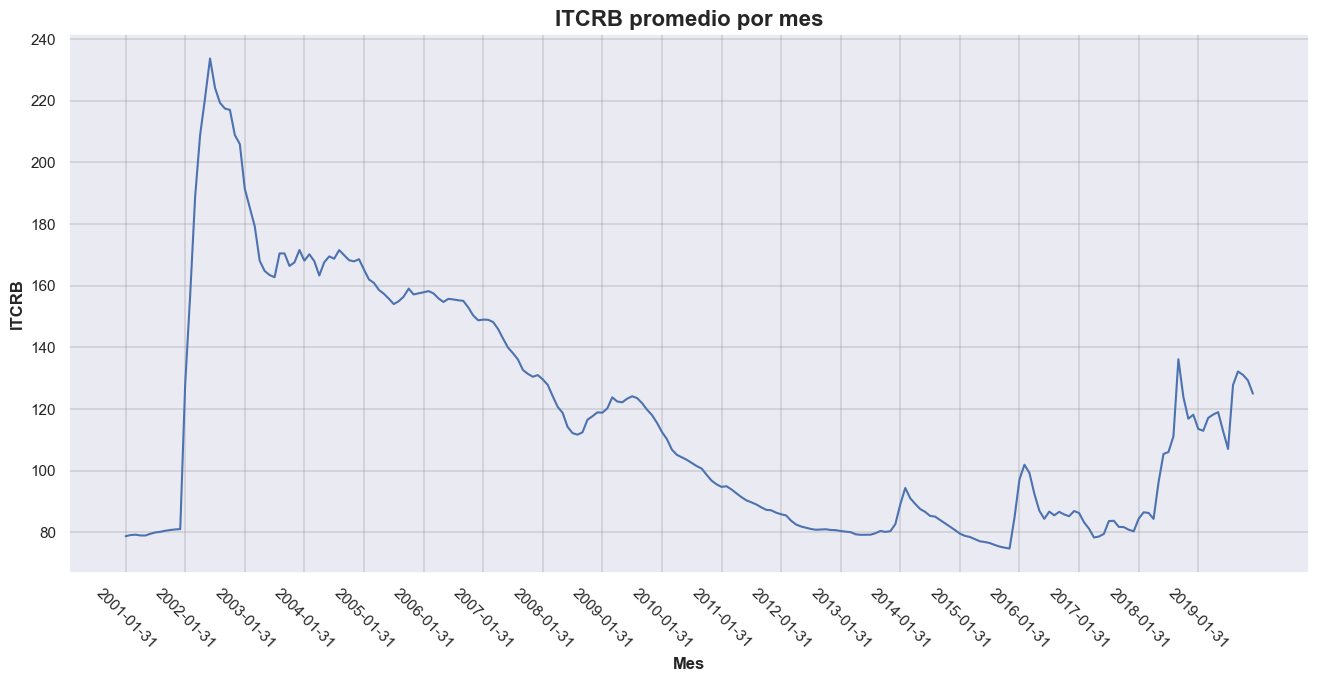

In [212]:
import matplotlib.pyplot as plt

ANIO3 = ITCRB_USA.index[::12]


fig, ax = plt.subplots(1, 1, figsize=(16,7))
ax.plot(ITCRB_USA.index, ITCRB_USA["ITCRB Estados Unidos"], label="Vuelos")
ax.set_xticks(ANIO3)
ax.tick_params(axis='x', labelrotation=-45)
ax.set_title("ITCRB promedio por mes", fontweight="bold", fontsize=16)
ax.set_xlabel("Mes", fontweight="bold")
ax.set_ylabel("ITCRB", fontweight="bold")
ax.grid(True, linestyle='-', linewidth=0.3, color="gray")
plt.savefig("ITCRB con grilla.png", bbox_inches='tight', dpi=300) 

In [214]:
# DESPUES DE LIMPIAR LA BASE DE ITCRB PONGO EL INDICE DE VUELOS IGUAL AL DE ITCRB
PASAJEROS_A_USA_indice_normalizado=PASAJEROS_A_USA.copy()
PASAJEROS_A_USA_indice_normalizado.index=ITCRB_USA.index

In [216]:
PASAJEROS_A_USA_indice_normalizado=PASAJEROS_A_USA_indice_normalizado.drop(["Unnamed: 0"], axis = 1) 

In [218]:
PASAJEROS_A_USA_indice_normalizado=PASAJEROS_A_USA_indice_normalizado.astype(float)

In [220]:
PASAJEROS_A_USA_indice_normalizado = PASAJEROS_A_USA_indice_normalizado["TOTAL"]

In [222]:
PASAJEROS_A_USA_indice_normalizado

Período
2001-01-31    95.459000
2001-02-28    91.561000
2001-03-31    91.729000
2001-04-30    85.051000
2001-05-31    80.068000
                ...    
2019-08-31   156.791000
2019-09-30   147.224000
2019-10-31   157.266000
2019-11-30   132.890000
2019-12-31   144.660000
Name: TOTAL, Length: 228, dtype: float64

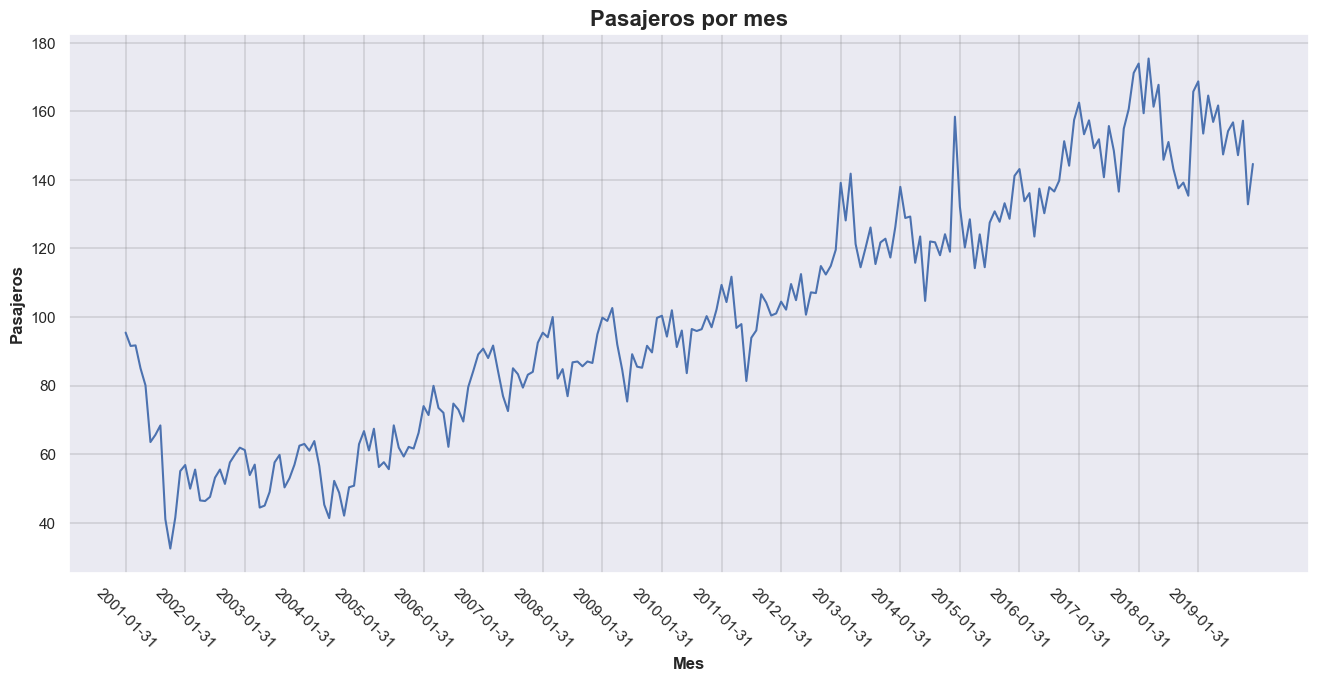

In [224]:
ANIO3 = PASAJEROS_A_USA_indice_normalizado.index[::12]

fig, ax = plt.subplots(1, 1, figsize=(16,7))
ax.plot(PASAJEROS_A_USA_indice_normalizado.index, PASAJEROS_A_USA_indice_normalizado, label="Vuelos")
ax.set_xticks(ANIO3)
ax.tick_params(axis='x', labelrotation=-45)
ax.set_title("Pasajeros por mes", fontweight="bold", fontsize=16)
ax.set_xlabel("Mes", fontweight="bold")
ax.set_ylabel("Pasajeros", fontweight="bold")
ax.grid(True, linestyle='-', linewidth=0.3, color="gray")
plt.savefig("pasajeros.png", bbox_inches='tight', dpi=300)

# Preparo la validacion cruzada para elegir el grado del polinomio

In [227]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [229]:
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [231]:
ITCRB_USA

,ITCRB Estados Unidos,C1,C2
Período,,,
2001-01-31,78.726615,1,0
2001-02-28,79.097566,1,0
2001-03-31,79.213931,1,0
2001-04-30,78.960897,1,0
2001-05-31,78.955633,0,1
...,...,...,...
2019-08-31,127.743586,0,1
2019-09-30,132.140644,0,0
2019-10-31,131.041702,0,0


In [233]:
PASAJEROS_A_USA_indice_normalizado

Período
2001-01-31    95.459000
2001-02-28    91.561000
2001-03-31    91.729000
2001-04-30    85.051000
2001-05-31    80.068000
                ...    
2019-08-31   156.791000
2019-09-30   147.224000
2019-10-31   157.266000
2019-11-30   132.890000
2019-12-31   144.660000
Name: TOTAL, Length: 228, dtype: float64

In [235]:
PASAJEROS_X1000 = PASAJEROS_A_USA_indice_normalizado * 1000
PASAJEROS_X1000

Período
2001-01-31    95459.000000
2001-02-28    91561.000000
2001-03-31    91729.000000
2001-04-30    85051.000000
2001-05-31    80068.000000
                  ...     
2019-08-31   156791.000000
2019-09-30   147224.000000
2019-10-31   157266.000000
2019-11-30   132890.000000
2019-12-31   144660.000000
Name: TOTAL, Length: 228, dtype: float64

In [237]:
X = ITCRB_USA
y = PASAJEROS_X1000

In [239]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(228, 3) (228,)


In [241]:
X_train=X[:180]
X_test=X[180:]
y_train=y[:180]
y_test=y[180:]

In [243]:
y_train

Período
2001-01-31    95459.000000
2001-02-28    91561.000000
2001-03-31    91729.000000
2001-04-30    85051.000000
2001-05-31    80068.000000
                  ...     
2015-08-31   130832.000000
2015-09-30   127788.000000
2015-10-31   133199.000000
2015-11-30   128661.000000
2015-12-31   141195.000000
Name: TOTAL, Length: 180, dtype: float64

In [245]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [247]:
def transf_reg_poly(grado, X_train, X_test, y_train, y_test):
    
    poly = PolynomialFeatures(degree = grado, include_bias=False) 

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)  
  
    model = LinearRegression().fit(X_train_poly, y_train) 
    y_pred_poly = model.predict(X_test_poly)
    
    ecm = mean_squared_error(y_test, y_pred_poly)
    return model, ecm

In [249]:
ecms = pd.DataFrame(columns=["grado", "particion", "ecm"])
ecms

K = 10

for grado in range(1, 10):   

    kf = KFold(n_splits=K, shuffle=True, random_state=100)

    for i, (train_index2, val_index2) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index2], X_train.iloc[val_index2]
        y_train_fold, y_val_fold = y_train.iloc[train_index2], y_train.iloc[val_index2]
        
        ecm = transf_reg_poly(grado, X_train_fold, X_val_fold, y_train_fold, y_val_fold)[1]
            
        df_i = pd.DataFrame({"grado": grado, "particion": i, "ecm": ecm}, index=[0])
        ecms = pd.concat([ecms, df_i])
    
ecms = ecms.astype({"grado":int, "particion":int})
ecms

C:\Users\Computador\AppData\Local\Temp\ipykernel_7112\621802546.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ecms = pd.concat([ecms, df_i])


,grado,particion,ecm
0,1,0,495274200.616602
0,1,1,92209256.854061
0,1,2,270702436.051379
0,1,3,235446146.850693
0,1,4,486464337.880959
...,...,...,...
0,9,5,516787167.558887
0,9,6,176654137.287023
0,9,7,9538470359.728336
0,9,8,181840212.284781


In [251]:
ecms_avg = ecms.groupby('grado').agg({'ecm':'mean'})
ecms_avg.reset_index(inplace = True)
ecms_avg.astype({"grado":int})
pd.set_option('display.float_format', '{:.6f}'.format)
ecms_avg

,grado,ecm
0,1,299239650.220053
1,2,296101140.969482
2,3,290370847.819802
3,4,304117154.680602
4,5,294262935.129177
5,6,330408673.623739
6,7,529112760.336047
7,8,624968977.048823
8,9,1928468632.841867


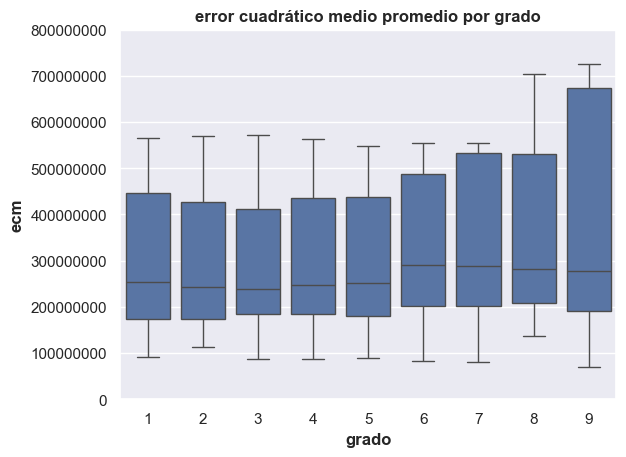

In [253]:
sns.set()
ss = sns.boxplot(data=ecms, x="grado", y="ecm")

plt.ticklabel_format(style='plain', axis='y')  # Esto evita la notación científica en Y
plt.ylim(bottom=0,top=800000000)
plt.title("error cuadrático medio promedio por grado", fontweight="bold")
plt.xlabel("grado", fontweight='bold')
plt.ylabel("ecm", fontweight='bold') 
plt.savefig("ECM sin notacion cientifica.png", bbox_inches='tight', dpi=300)
plt.show()

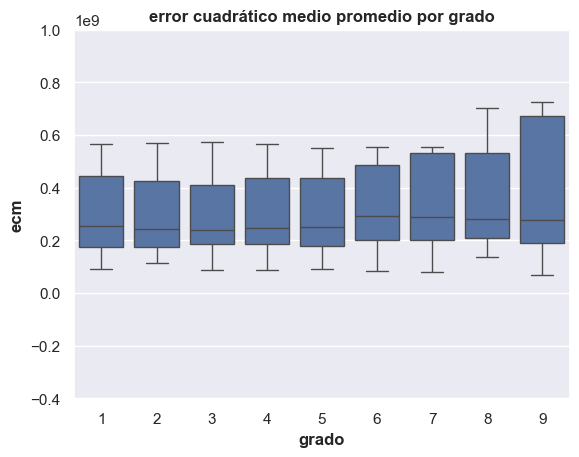

In [255]:
import seaborn as sns
sns.set()
ss = sns.boxplot(data=ecms, x="grado", y="ecm")
plt.title("error cuadrático medio promedio por grado", fontweight="bold")
plt.xlabel("grado", fontweight='bold')
plt.ylabel("ecm", fontweight='bold') 
plt.ylim(top=1000000000)
plt.savefig("ECM notacion cientifica.png", bbox_inches='tight', dpi=300)
plt.show()

In [257]:
modelo1, ecm1 = transf_reg_poly(1, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(1, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo1.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo1 = LinearRegression().fit(X_train_poly, y_train) 
r2g1 = modelo1.score(X_test_poly, y_test)

modelo2, ecm2 = transf_reg_poly(2, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(2, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo2.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo2 = LinearRegression().fit(X_train_poly, y_train) 
r2g2 = modelo2.score(X_test_poly, y_test)


modelo3, ecm3 = transf_reg_poly(3, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(3, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo3.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo3 = LinearRegression().fit(X_train_poly, y_train) 
r2g3 = modelo3.score(X_test_poly, y_test)


modelo4, ecm4 = transf_reg_poly(4, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(4, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo4.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo4 = LinearRegression().fit(X_train_poly, y_train) 
r2g4 = modelo4.score(X_test_poly, y_test)


modelo5, ecm5 = transf_reg_poly(5, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(5, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo5.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo5 = LinearRegression().fit(X_train_poly, y_train) 
r2g5 = modelo5.score(X_test_poly, y_test)


modelo6, ecm6 = transf_reg_poly(6, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(6, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo6.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo6 = LinearRegression().fit(X_train_poly, y_train) 
r2g6 = modelo6.score(X_test_poly, y_test)


modelo7, ecm7 = transf_reg_poly(7, X_train, X_test, y_train, y_test)
poly = PolynomialFeatures(7, include_bias=False)
X_test_poly = poly.fit(X_train).transform(X_test)
y_pred_poly = modelo7.predict(X_test_poly)
X_train_poly = poly.fit_transform(X_train) 
modelo7 = LinearRegression().fit(X_train_poly, y_train) 
r2g7 = modelo7.score(X_test_poly, y_test)

print("ecm con polinomio de grado 1", ecm1.round(2), "r2:", r2g1)
print("ecm con polinomio de grado 2", ecm2.round(2), "r2:", r2g2)
print("ecm con polinomio de grado 3", ecm3.round(2), "r2:", r2g3)
print("ecm con polinomio de grado 4", ecm4.round(2), "r2:", r2g4)
print("ecm con polinomio de grado 5", ecm5.round(2), "r2:", r2g5)
print("ecm con polinomio de grado 6", ecm6.round(2), "r2:", r2g6)
print("ecm con polinomio de grado 7", ecm7.round(2), "r2:", r2g7)

ecm con polinomio de grado 1 2805192541.6 r2: -17.83857805375756
ecm con polinomio de grado 2 2861091307.57 r2: -18.21397234499714
ecm con polinomio de grado 3 2694984601.52 r2: -17.09846454975078
ecm con polinomio de grado 4 2721973302.71 r2: -17.27971013149744
ecm con polinomio de grado 5 2690195630.43 r2: -17.066303689383822
ecm con polinomio de grado 6 2704743870.71 r2: -17.164003991962637
ecm con polinomio de grado 7 2717129499.03 r2: -17.247181036818528


In [259]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

modelo_ols = sm.OLS(y_train, X_train_const)
resultados = modelo_ols.fit()

print(resultados.summary())

# Predicciones sobre testeo
X_test_const = sm.add_constant(X_test)
y_pred = resultados.predict(X_test_const)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMSE test: {mse:.2f}')
print(f'R² test: {r2:.3f}')

                            OLS Regression Results                            
Dep. Variable:                  TOTAL   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     91.96
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           7.65e-36
Time:                        23:02:44   Log-Likelihood:                -2006.7
No. Observations:                 180   AIC:                             4021.
Df Residuals:                     176   BIC:                             4034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.499e+05 

C:\Users\Computador\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


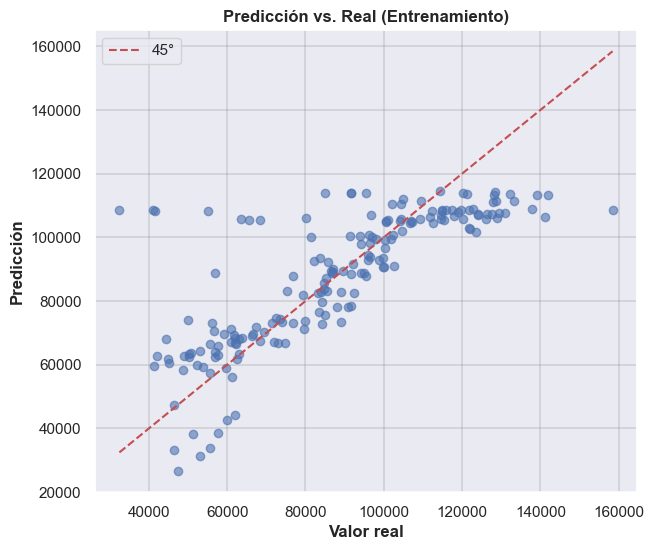

In [261]:
y_pred_poly_train = modelo1.predict(X_train)


plt.figure(figsize=(7,6))
plt.scatter(y_train, y_pred_poly_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="45°")
plt.xlabel("Valor real", fontweight="bold")
plt.ylabel("Predicción", fontweight="bold")
plt.title("Predicción vs. Real (Entrenamiento)", fontweight="bold")
plt.grid(True, linestyle='-', linewidth=0.3, color="gray")
plt.legend()
plt.grid(True)

plt.show()

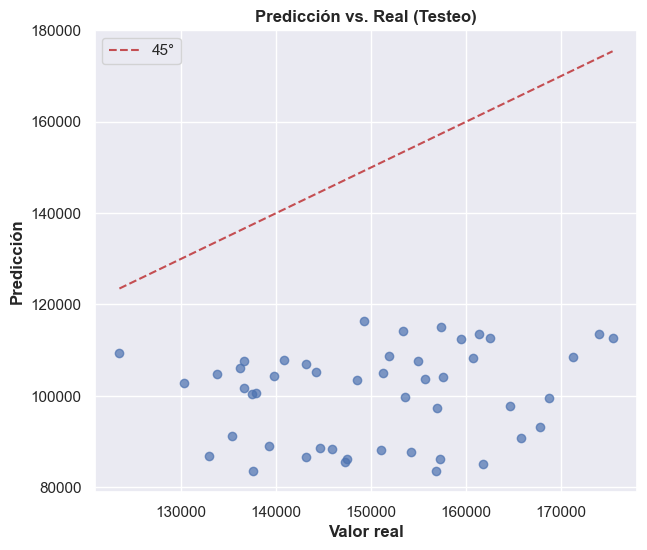

In [263]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_poly, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="45°")
plt.xlabel("Valor real", fontweight="bold")
plt.ylabel("Predicción", fontweight="bold")
plt.title("Predicción vs. Real (Testeo)", fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()

# Pruebo con Ridge

In [266]:
from sklearn.preprocessing import StandardScaler

In [268]:
sc = StandardScaler()

X_train_transformed = X_train.copy()
X_train_transformed["ITCRB Estados Unidos"] = sc.fit_transform(X_train[["ITCRB Estados Unidos"]])

X_test_transformed = X_test.copy()
X_test_transformed["ITCRB Estados Unidos"] = sc.transform(X_test[["ITCRB Estados Unidos"]])

In [270]:
X_train_transformed

,ITCRB Estados Unidos,C1,C2
0,-1.075715,1,0
1,-1.066559,1,0
2,-1.063687,1,0
3,-1.069933,1,0
4,-1.070063,0,1
...,...,...,...
175,-1.145706,0,1
176,-1.158701,0,0
177,-1.167566,0,0
178,-1.174370,0,0


In [272]:
alphas = 10**np.linspace(6,-2,50)*0.5
np.set_printoptions(suppress = True)
alphas

array([500000.        , 343324.42250215, 235743.31817287, 161872.87714088,
       111149.82412631,  76320.89835876,  52405.65670773,  35984.28365006,
        24708.56680662,  16966.10885948,  11649.75905258,   7999.29359803,
         5492.70570994,   3771.56003168,   2589.73733962,   1778.24015311,
         1221.02654727,    838.41646841,    575.69769966,    395.30216055,
          271.43377197,    186.37968602,    127.97739613,     87.87553124,
           60.33963203,     41.43213864,     28.44933015,     19.53469969,
           13.41347898,      9.21034985,      6.32427608,      4.34255687,
            2.98181166,      2.04745753,      1.40588435,      0.96534886,
            0.66285568,      0.45514909,      0.3125276 ,      0.21459671,
            0.14735259,      0.10117948,      0.06947477,      0.04770477,
            0.03275643,      0.02249216,      0.01544422,      0.01060475,
            0.00728174,      0.005     ])

In [274]:
ridgecv = RidgeCV(alphas=alphas, cv=5).fit(X_train_transformed, y_train)
print("El mejor alpha:", ridgecv.alpha_)

# Ahora con el alpha óptimo, volvemos a estimar nuestro modelo
ridge = Ridge(alpha=ridgecv.alpha_)
ridge = ridge.fit(X_train_transformed, y_train)
ridge_pred = ridge.predict(X_test_transformed)
ecm_ridge = mean_squared_error(y_test, ridge_pred)

print("Mean Squared Error de testeo (MSE test):", ecm_ridge.round(2))   

print("Coeficientes del mejor modelo:")
print(pd.Series(ridgecv.coef_, index = X_train_transformed.columns).round(2)) 

r2 = ridge.score(X_test_transformed, y_test)
print("r2:", r2)

El mejor alpha: 1.4058843489871153
Mean Squared Error de testeo (MSE test): 2813289650.53
Coeficientes del mejor modelo:
ITCRB Estados Unidos   -20645.690000
C1                       4450.090000
C2                      -3326.530000
dtype: float64
r2: -17.89295507651225
